This notebook provide tools to evaluate your trained models quantitatively and qualitatively. You can:

* Calculate BLEU, ROUGE and F1.
* Find Loss

* Create a pianoroll viz (from a NoteSequence with BokehJS).
* Synthesize & download audio (from a NoteSequence with the gorgeous Yamaha C5 Salamander SoundFont).

* Run inference on unseen data

--- 

## Environment Setup

**JUPYTER**
* Do not use Jupyter Lab. It disables JS which breaks Bokeh and the pianoroll.
* Start a regular Jupyter Notebook with ~increased~ data rate. Otherwise the audio synthesis overflows.
    * `jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000 1.5\ Interactively\ Explore.ipynb`
    
**FILE DEPENDENCIES**
* Salamander piano SoundFont. Samples by Alexander Holm [[Link](https://archive.org/details/SalamanderGrandPianoV3)]. Converted to sf2 by John Nebauer [[Link](https://sites.google.com/site/soundfonts4u)]. You can fetch those from here (591.9 MiB):
    * `gsutil -m cp gs://download.magenta.tensorflow.org/soundfonts/Yamaha-C5-Salamander-JNv5.1.sf2 /tmp/`
    
**OTHER DEPENDENCIES**

To synthesize audio, you will need `fluidsynth` [[Homepage](http://www.fluidsynth.org/)] [[GitHub](https://github.com/FluidSynth/fluidsynth)] and `pyfluidsynth` [[GitHub](https://github.com/nwhitehead/pyfluidsynth)]. Be warned, those can be a pain to install. 
* `fluidsynth` failed repeatingly with `brew`. Eventually, installation worked with `macports` after I updated the entire tree (which took ages).
* `pyfluidsynth` implements Python bindings. Note that there are a few forks floating online. Some of the high ranking results on Google are dated version for Python 2.7. In the end, [this](https://github.com/nwhitehead/pyfluidsynth) worked for me.
* Keep in mind as well that there is a PyPI (`pip install`) module called `fluidsynth` which you must NOT installed.
    
    
    
Lastly, this Jupyter borrows backend from the [Magenta Performance RNN Colaboratory](https://colab.research.google.com/notebooks/magenta/performance_rnn/performance_rnn.ipynb?authuser=0#scrollTo=nzGyqJja7I0O).

## First things first

In [1]:
from utils.text_seqs import TextSequence, TextSequenceCollection

In [2]:
config = {}
config['steps_per_quarter'] = 4

config['inputs'] = './data/processed/heron/eval_inputs.txt'
config['targets'] = './data/processed/heron/eval_targets.txt'
config['predicted'] = './trained_models/2018-07-05_2103/run_dir/model_dir/eval/predictions.txt.6255'

# Interactive

In [3]:
inputs = TextSequenceCollection(config['inputs'])
predicted = TextSequenceCollection(config['predicted'])
targets = TextSequenceCollection(config['targets'])

In [4]:
i = 18
i = 36
i = 32
i = 38

### Inputs

In [5]:
inputs.viz(i)
inputs.synth(i)

Loading BokehJS ...

### Predicted

In [6]:
predicted.viz(i)
predicted.synth(i)

Loading BokehJS ...

### Targets

In [7]:
targets.viz(i)
targets.synth(i)

Loading BokehJS ...

## Experiments

In [2]:
# seq_inputs.export('filename.midi')

In [9]:
import music21
score = music21.converter.parse('filename.midi')
key = score.analyze('key')
print(key.tonic.name, key.mode)

C minor


In [14]:
# shows how well this key fits the profile of a piece in that key
key.correlationCoefficient

0.8852824613864316

In [15]:
# Provide a measure of tonal ambiguity for Key determined with one of many methods.
key.tonalCertainty()

0.9206181001435909

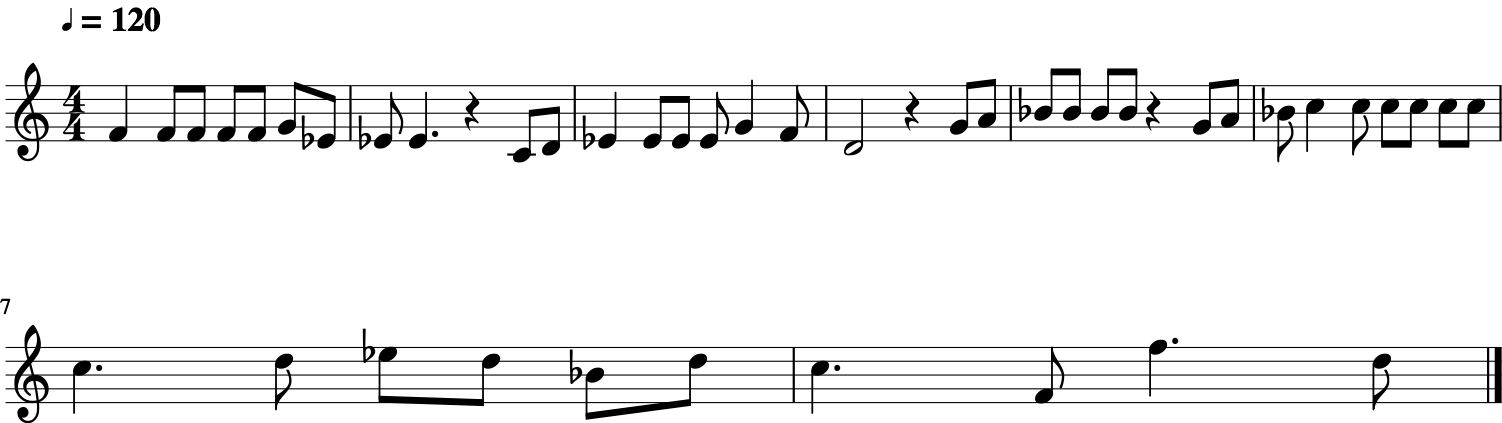

In [25]:
score.show()

In [53]:
ts = music21.meter.bestTimeSignature(score)

In [59]:
print(ts)
print(music21.meter.bestTimeSignature(score).beatDivisionCountName)
print(ts.beatCountName) # Simple or Compound
print(ts.beatDivisionCount) # This should remain unchanged between inputs and targets
print(ts.beatDivisionDurations)
print(ts.beatDuration)

<music21.meter.TimeSignature 32/4>
Simple
32-uple
2
[<music21.duration.Duration 0.5>, <music21.duration.Duration 0.5>]
<music21.duration.Duration 1.0>


In [61]:
print(ts.barDuration)
print(ts.beatCount)

<music21.duration.Duration 32.0>
32


In [63]:
score.beat

In [48]:
music21.meter.bestTimeSignature(score).numerator

32

In [45]:
music21.meter.bestTimeSignature(score).beatCount

32

In [33]:
# ambitus: measures register, the range of pitches used in a melodic line
ambitus = score.analyze('ambitus')

<music21.interval.Interval P11>

In [39]:
# For a given subStream, return the smallest .ps difference between any two pitches 
# and the largest difference between any two pitches. This is used to get the smallest 
# and largest ambitus possible in a given work.
p = music21.analysis.discrete.Ambitus()
p.getPitchRanges(score)

(0, 17)

In [40]:
p.getPitchSpan(score)

(<music21.pitch.Pitch C4>, <music21.pitch.Pitch F5>)

In [66]:
score.seconds

StreamException: cannot get a seconds duration when no TempoIndication classes are found in or before this Stream.